In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 64s 33ms/step - loss: 0.2029 - accuracy: 0.9392
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0818 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0580 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0438 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0342 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0313 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0244 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0231 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0210 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 67s 35m

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0645 - accuracy: 0.9838


[0.06451839208602905, 0.9837999939918518]

1/1 [==============================] - 0s 153ms/step
6


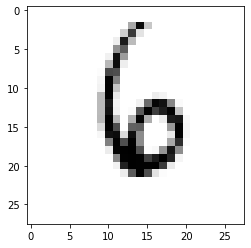

In [10]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())